# 1. Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [2]:
summer = pd.read_csv("https://raw.githubusercontent.com/eozhisarcikli/olympic-game-analysis/main/data/summer.csv")
winter = pd.read_csv("https://raw.githubusercontent.com/eozhisarcikli/olympic-game-analysis/main/data/winter.csv")
track = pd.read_csv("https://raw.githubusercontent.com/eozhisarcikli/olympic-game-analysis/main/data/data.csv")
countries = pd.read_csv("https://raw.githubusercontent.com/eozhisarcikli/olympic-game-analysis/main/data/dictionary.csv")

# 2. Data Cleaning

In [3]:
countries.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [4]:
track.head()

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event
0,1,00:01:40.910000,David Rudisha,KEN,1988-12-17,1.0,London,2012-09-08,Men,800 m
1,2,00:01:41.010000,David Rudisha,KEN,1988-12-17,1.0,Rieti,2010-08-29,Men,800 m
2,3,00:01:41.090000,David Rudisha,KEN,1988-12-17,1.0,Berlin,2010-08-22,Men,800 m
3,4,00:01:41.110000,Wilson Kipketer,DEN,1970-12-12,1.0,Köln,1997-08-24,Men,800 m
4,5,00:01:41.240000,Wilson Kipketer,DEN,1970-12-12,1.0,Zürich,1997-08-13,Men,800 m


In [5]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [6]:
summer=summer.merge(countries,left_on='Country',right_on='Code',how='left')
summer=summer[['Year','City','Sport','Discipline','Athlete','Country_x','Gender','Event','Medal','Country_y']]
summer.columns=['Year','City','Sport','Discipline','Athlete','Code','Gender','Event','Medal','Country']

In [7]:
summer['Athlete']=summer['Athlete'].str.split(', ').str[::-1].str.join(' ').str.title()
summer.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Austria
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Greece


In [8]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [9]:
winter=winter.merge(countries,left_on='Country',right_on='Code',how='left')
winter=winter[['Year','City','Sport','Discipline','Athlete','Country_x','Gender','Event','Medal','Country_y']]
winter.columns=['Year','City','Sport','Discipline','Athlete','Code','Gender','Event','Medal','Country']

In [10]:
winter['Athlete']=winter['Athlete'].str.split(', ').str[::-1].str.join(' ').str.title()
winter.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,1924,Chamonix,Biathlon,Biathlon,G. Berthet,FRA,Men,Military Patrol,Bronze,France
1,1924,Chamonix,Biathlon,Biathlon,C. Mandrillon,FRA,Men,Military Patrol,Bronze,France
2,1924,Chamonix,Biathlon,Biathlon,Maurice Mandrillon,FRA,Men,Military Patrol,Bronze,France
3,1924,Chamonix,Biathlon,Biathlon,André Vandelle,FRA,Men,Military Patrol,Bronze,France
4,1924,Chamonix,Biathlon,Biathlon,Adolf Aufdenblatten,SUI,Men,Military Patrol,Gold,Switzerland


# 3. Analysis

## 3.1 Summer Olympics

### 3.1.1 Medals by Athlete

In [11]:
medals_summer = summer.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
medals_summer

,Athlete,Medal,Sport
17344,Michael Phelps,Gold,18
3517,Carl Lewis,Gold,9
16581,Mark Spitz,Gold,9
19224,Paavo Nurmi,Gold,9
14731,Larisa Latynina,Gold,9
...,...,...,...
9532,Harald Sandberg,Bronze,1
9531,Harald S.A. Julin,Silver,1
9529,Harald Oliver Faerstad,Silver,1
9528,Harald Norpoth,Silver,1


In [12]:
medals_summer = medals_summer.drop_duplicates(subset=['Medal'],keep='first')
medals_summer.columns = [['Athlete','Medal','Count']]
medals_summer

,Athlete,Medal,Count
17344,Michael Phelps,Gold,18
7645,Franziska Van Almsick,Bronze,6
22307,Shirley Farber Babashoff,Silver,6


In [13]:
male_most_medals_summer = summer[summer['Gender']=='Men']['Athlete'].value_counts().index[0]
male_medals_summer = summer[summer['Gender']=='Men']['Athlete'].value_counts().values[0]
female_most_medals_summer = summer[summer['Gender']=='Women']['Athlete'].value_counts().index[0]
female_medals_summer = summer[summer['Gender']=='Women']['Athlete'].value_counts().values[0]

print('The Highest Decorated Male Athlete is',male_most_medals_summer,'with',male_medals_summer,'medals')
print('The Highest Decorated Female Athlete is',female_most_medals_summer,'with',female_medals_summer,'medals')

The Highest Decorated Male Athlete is Michael Phelps with 22 medals
The Highest Decorated Female Athlete is Larisa Latynina with 18 medals


### 3.1.2 Medals by Country

In [14]:
medals_country_summer = summer.groupby(['Country','Medal'])['Athlete'].count().reset_index()
medals_country_summer = medals_country_summer.pivot('Country','Medal','Athlete').fillna(0)
medals_country_summer

Medal,Bronze,Gold,Silver
Country,,,
Afghanistan,2.0,0.0,0.0
Algeria,8.0,5.0,2.0
Argentina,91.0,69.0,99.0
Armenia,8.0,1.0,2.0
Australia,472.0,312.0,405.0
...,...,...,...
Venezuela,8.0,2.0,2.0
Vietnam,0.0,0.0,2.0
Virgin Islands*,0.0,0.0,1.0


In [15]:
top_summer = medals_country_summer.sort_values(by='Gold',ascending=False)[:10]
top_summer = top_summer.sort_values(['Gold','Silver','Bronze'],ascending=True)
top_summer

Medal,Bronze,Gold,Silver
Country,,,
Russia,291.0,239.0,238.0
China,221.0,290.0,296.0
Australia,472.0,312.0,405.0
Sweden,328.0,349.0,367.0
France,497.0,408.0,491.0
Hungary,351.0,412.0,316.0
Germany,475.0,452.0,378.0
Italy,404.0,476.0,416.0
United Kingdom,553.0,546.0,621.0


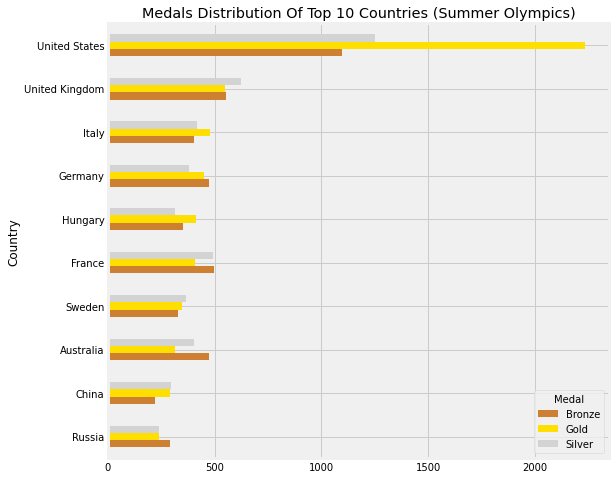

In [16]:
top_summer.plot.barh(width=0.5,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.title('Medals Distribution Of Top 10 Countries (Summer Olympics)')
plt.show()

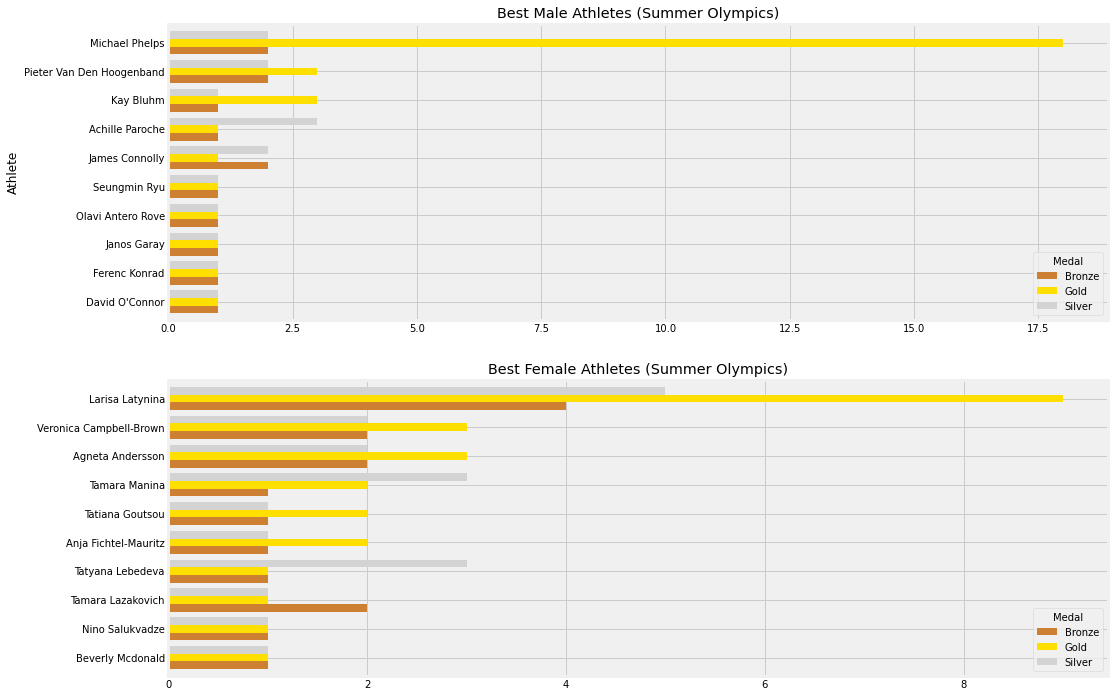

In [45]:
fig,ax=plt.subplots(2,1,figsize=(15,12))
men_summer=summer[summer['Gender']=='Men']
men_summer=men_summer.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
men_summer=men_summer[men_summer['Athlete'].isin(men_summer['Athlete'].value_counts().index[:10])]
men_summer=men_summer.pivot('Athlete','Medal','Sport').fillna(0).sort_values(['Gold','Silver','Bronze'],ascending=True)
men_summer.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Best Male Athletes (Summer Olympics)')
ax[0].set_ylabel('Athlete')

women_summer=summer[summer['Gender']=='Women']
women_summer=women_summer.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
women_summer=women_summer[women_summer['Athlete'].isin(women_summer['Athlete'].value_counts().index[:10])]
women_summer=women_summer.pivot('Athlete','Medal','Sport').fillna(0).sort_values(['Gold','Silver','Bronze'],ascending=True)
women_summer.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[1])
ax[1].set_title('Best Female Athletes (Summer Olympics)')
ax[1].set_ylabel('')
plt.show()

## 3.2 Winter Olympics

### 3.2.1 Medals by Athlete

In [18]:
medals_winter = winter.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
medals_winter

,Athlete,Medal,Sport
569,Björn Daehlie,Gold,8
3303,Ole Einar Bjoerndalen,Gold,8
1655,Harri Kirvesniemi,Bronze,6
2841,Marit Bjoergen,Gold,6
2658,Ljubov Egorova,Gold,6
...,...,...,...
1713,Henrik Lundqvist,Gold,1
1714,Henrik Lundqvist,Silver,1
1715,Henrik Sedin,Gold,1
1716,Henrik Tallinder,Silver,1


In [19]:
medals_winter = medals_winter.drop_duplicates(subset=['Medal'],keep='first')
medals_winter.columns = [['Athlete','Medal','Count']]
medals_winter

,Athlete,Medal,Count
569,Björn Daehlie,Gold,8
1655,Harri Kirvesniemi,Bronze,6
3568,Raisa Smetanina,Silver,5


In [20]:
male_most_medals_winter = winter[winter['Gender']=='Men']['Athlete'].value_counts().index[0]
male_medals_winter = winter[winter['Gender']=='Men']['Athlete'].value_counts().values[0]
female_most_medals_winter = winter[winter['Gender']=='Women']['Athlete'].value_counts().index[0]
female_medals_winter = winter[winter['Gender']=='Women']['Athlete'].value_counts().values[0]

print('The Highest Decorated Male Athlete is',male_most_medals_winter,'with',male_medals_winter,'medals')
print('The Highest Decorated Female Athlete is',female_most_medals_winter,'with',female_medals_winter,'medals')

The Highest Decorated Male Athlete is Ole Einar Bjoerndalen with 13 medals
The Highest Decorated Female Athlete is Stefania Belmondo with 10 medals


### 3.2.2 Medals by Country

In [21]:
medals_country_winter = winter.groupby(['Country','Medal'])['Athlete'].count().reset_index()
medals_country_winter = medals_country_winter.pivot('Country','Medal','Athlete').fillna(0)
medals_country_winter

Medal,Bronze,Gold,Silver
Country,,,
Australia,7.0,5.0,3.0
Austria,103.0,79.0,98.0
Belarus,5.0,6.0,4.0
Belgium,7.0,2.0,4.0
Bulgaria,3.0,1.0,2.0
Canada,107.0,315.0,203.0
China,36.0,16.0,30.0
Croatia,1.0,4.0,6.0
Czech Republic,35.0,28.0,12.0


In [22]:
top_winter = medals_country_winter.sort_values(by='Gold',ascending=False)[:10]
top_winter = top_winter.sort_values(['Gold','Silver','Bronze'],ascending=True)
top_winter

Medal,Bronze,Gold,Silver
Country,,,
Italy,77.0,58.0,57.0
Finland,221.0,66.0,147.0
Switzerland,132.0,76.0,77.0
Austria,103.0,79.0,98.0
Russia,79.0,94.0,90.0
Sweden,177.0,127.0,129.0
Germany,97.0,137.0,126.0
Norway,127.0,159.0,171.0
United States,167.0,167.0,319.0


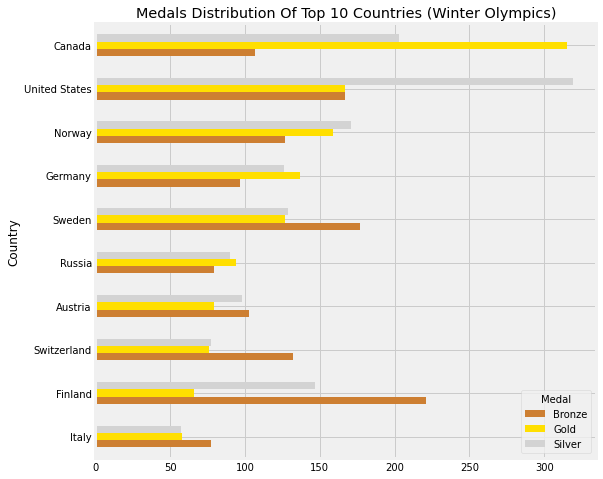

In [23]:
top_winter.plot.barh(width=0.5,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.title('Medals Distribution Of Top 10 Countries (Winter Olympics)')
plt.show()

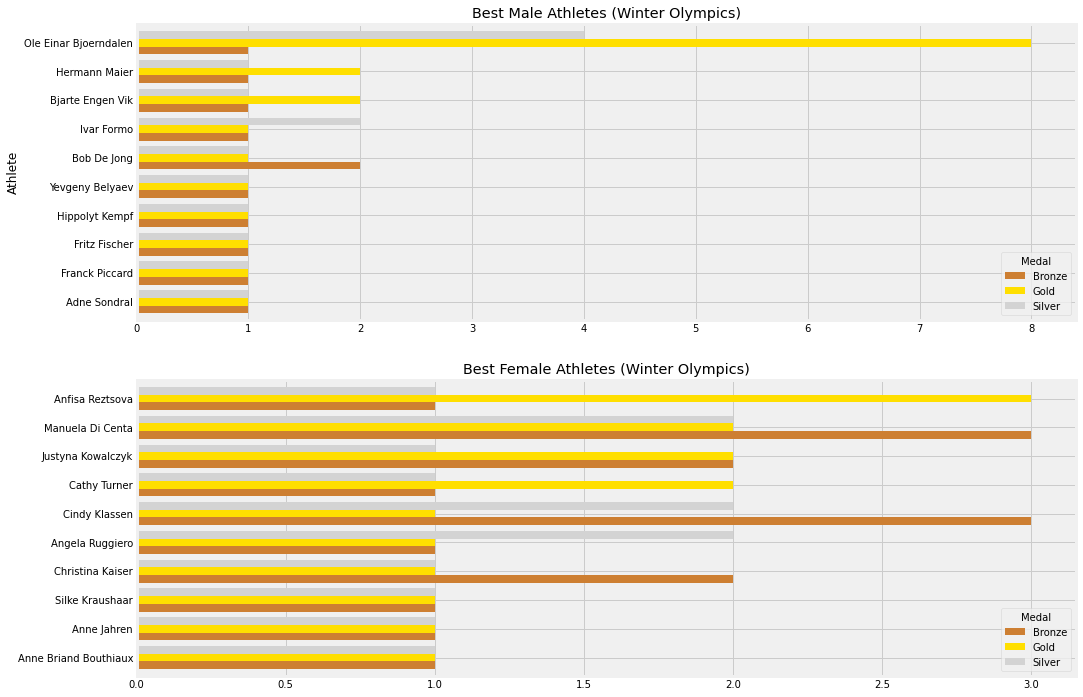

In [46]:
fig,ax=plt.subplots(2,1,figsize=(15,12))
men_winter=winter[winter['Gender']=='Men']
men_winter=men_winter.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
men_winter=men_winter[men_winter['Athlete'].isin(men_winter['Athlete'].value_counts().index[:10])]
men_winter=men_winter.pivot('Athlete','Medal','Sport').fillna(0).sort_values(['Gold','Silver','Bronze'],ascending=True)
men_winter.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Best Male Athletes (Winter Olympics)')
ax[0].set_ylabel('Athlete')

women_winter=winter[winter['Gender']=='Women']
women_winter=women_winter.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
women_winter=women_winter[women_winter['Athlete'].isin(women_winter['Athlete'].value_counts().index[:10])]
women_winter=women_winter.pivot('Athlete','Medal','Sport').fillna(0).sort_values(['Gold','Silver','Bronze'],ascending=True)
women_winter.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[1])
ax[1].set_title('Best Female Athletes (Winter Olympics)')
ax[1].set_ylabel('')
plt.show()